In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
#Call required libraries
import time                   
import warnings               
import numpy as np            
import pandas as pd           
import matplotlib.pyplot as plt                   
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture 

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data Analysis Section

Read in all files and sheets

In [0]:
holiday_pd = pd.read_excel('/content/drive/My Drive/Data Folder/Data_Workbook.xlsx', sheet_name = 'Holiday Dates')
lat_long_data = pd.read_excel('/content/drive/My Drive/Data Folder/Data_Workbook.xlsx', sheet_name = 'City-Lat-Long')
county_load = pd.read_excel('/content/drive/My Drive/Data Folder/Data_Workbook.xlsx', sheet_name = 'Load By County 2018')
county_gdp = pd.read_excel('/content/drive/My Drive/Data Folder/Data_Workbook.xlsx', sheet_name = 'GDP By County 2018')
city_pop = pd.read_excel('/content/drive/My Drive/Data Folder/Data_Workbook.xlsx', sheet_name = 'City Population')
city_elec = pd.read_excel('/content/drive/My Drive/Data Folder/City_Electricity_Data.xlsx')
caiso_2016 = pd.read_excel('/content/drive/My Drive/Data Folder/CAISO Load.xlsx',sheet_name = '2016')
caiso_2017 = pd.read_excel('/content/drive/My Drive/Data Folder/CAISO Load.xlsx',sheet_name = '2017')
caiso_2018 = pd.read_excel('/content/drive/My Drive/Data Folder/CAISO Load.xlsx',sheet_name = '2018')
city_wx_data = pd.read_csv('/content/drive/My Drive/Data Folder/all_wx_data.csv')
city_elec_complete = city_elec.dropna()
city_elec_complete = city_elec_complete.drop_duplicates()

In [0]:
len(city_wx_data)

11852280

In [0]:
city_wx_data = city_wx_data[['City', 'Year', 'Month', 'Day', 'Hour', 'Temperature',
       'Relative Humidity', 'Precipitable Water', 'Wind Direction',
       'Cloud Type', 'Dew Point', 'Wind Speed']]
city_elec_complete = city_elec_complete.reset_index()
city_elec_complete = city_elec_complete.drop('index', axis = 1)
city_wx_data = city_wx_data.drop_duplicates()
caiso_total = caiso_2016.append([caiso_2017,caiso_2018])
caiso_total['Date'] = pd.to_datetime(caiso_total['Date'])
caiso_total['Month'] = caiso_total['Date'].dt.month
caiso_total['Day'] = caiso_total['Date'].dt.day
caiso_total['Year'] = caiso_total['Date'].dt.year
caiso_total['Day_of_week'] = caiso_total['Date'].dt.dayofweek
caiso_total['Week'] = caiso_total['Date'].dt.week
caiso_total = caiso_total.rename(columns={"HE": "Hour"})

Merge All Data, Correlations and Visualizations

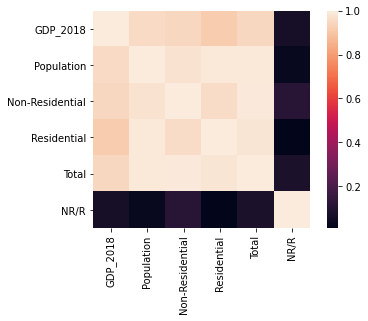

In [0]:
county_data = pd.merge(county_gdp,county_load, on = ['County'])
correlations = county_data.corr() #Calculate the correlation of the above variables
sns.heatmap(correlations, square = True) #Plot the correlation as heat map

In [0]:
pip install geopandas

In [0]:
pip install plotly-geo

     |████████████████████████████████| 23.7MB 1.3MB/s 


In [0]:
pip install shapely

In [0]:
pip install pyshp

# California State Map by Population and Electricity Consumption -- needs work Zo

In [0]:
import plotly.figure_factory as ff

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'California']

county_data['FIPS Code'] = df_sample_r['FIPS'].values

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=county_data['FIPS Code'].values, values=county_data['Population'].values, scope=['CA'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California by Population'
)
fig.layout.template = None
fig.show()

fig_1 = ff.create_choropleth(
    fips=county_data['FIPS Code'].values, values=county_data['Non-Residential'].values, scope=['CA'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Electricity Consumption by County', title='California by Non-Residential Electricity Consumption'
)
fig_1.layout.template = None
fig_1.show()

fig_1_1 = ff.create_choropleth(
    fips=county_data['FIPS Code'].values, values=county_data['Residential'].values, scope=['CA'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Electricity Consumption by County', title='California by Total Electricity Consumption'
)
fig_1_1.layout.template = None
fig_1_1.show()

fig_2 = ff.create_choropleth(
    fips=county_data['FIPS Code'].values, values=county_data['Total'].values, scope=['CA'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Electricity Consumption by County', title='California by Total Electricity Consumption'
)
fig_2.layout.template = None
fig_2.show()


ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



ValueError: ignored

In [0]:
# No of cities we have electricity data on
ca_cities = list(set(city_elec_complete.City.values))
len(ca_cities)

451

# Top Population Centers


In [0]:
city_population_ca = city_elec_complete[['City','total_pop']]
city_population_ca.sort_values(ascending = False,by = 'total_pop').head(10)

,City,total_pop
0,Los Angeles,3918872.0
104,San Diego,1374812.0
349,San Jose,1009363.0
277,San Francisco,850282.0
246,Fresno,513807.0
278,Sacramento,484530.0
47,Long Beach,469793.0
316,Oakland,412040.0
214,Bakersfield,367555.0
174,Anaheim,346776.0


# Top Load Centers

In [0]:
city_elec_complete['total_elec_mwh'] = city_elec_complete['res_elec_mwh']+city_elec_complete['com_elec_mwh']+city_elec_complete['ind_elec_mwh']
city_elec_complete.sort_values(ascending = False,by = 'total_elec_mwh').head(10)

,City,housing_units,total_pop,res_elec_mwh,com_units,com_elec_mwh,ind_units,ind_elec_mwh,total_elec_mwh
0,Los Angeles,1355074.0,3918872.0,9043891.0,49649.0,12023369.0,49649.0,12023369.0,33090629.0
277,San Francisco,356797.0,850282.0,1326629.0,14641.0,4236898.0,14641.0,4236898.0,9800425.0
104,San Diego,490141.0,1374812.0,2370489.0,15918.0,2311372.0,15918.0,2311372.0,6993233.0
148,Moreno Valley,51324.0,202061.0,392159.0,1120.0,2382179.0,1120.0,2382179.0,5156517.0
349,San Jose,317315.0,1009363.0,1850979.0,10458.0,1517782.0,10458.0,1517782.0,4886543.0
278,Sacramento,179377.0,484530.0,1360998.0,5795.0,923123.0,5795.0,923123.0,3207244.0
246,Fresno,163926.0,513807.0,1248953.0,6081.0,956898.0,6081.0,956898.0,3162749.0
316,Oakland,159072.0,412040.0,728202.0,7043.0,984793.0,7043.0,984793.0,2697788.0
47,Long Beach,163850.0,469793.0,805726.0,5468.0,712853.0,5468.0,712853.0,2231432.0
21,Inglewood,36574.0,111012.0,161285.0,1496.0,934773.0,1496.0,934773.0,2030831.0


In [0]:
city_elec_complete.sort_values(ascending = False,by = 'com_elec_mwh').head(10)

,City,housing_units,total_pop,res_elec_mwh,com_units,com_elec_mwh,ind_units,ind_elec_mwh,total_elec_mwh
0,Los Angeles,1355074.0,3918872.0,9043891.0,49649.0,12023369.0,49649.0,12023369.0,33090629.0
277,San Francisco,356797.0,850282.0,1326629.0,14641.0,4236898.0,14641.0,4236898.0,9800425.0
148,Moreno Valley,51324.0,202061.0,392159.0,1120.0,2382179.0,1120.0,2382179.0,5156517.0
104,San Diego,490141.0,1374812.0,2370489.0,15918.0,2311372.0,15918.0,2311372.0,6993233.0
349,San Jose,317315.0,1009363.0,1850979.0,10458.0,1517782.0,10458.0,1517782.0,4886543.0
316,Oakland,159072.0,412040.0,728202.0,7043.0,984793.0,7043.0,984793.0,2697788.0
246,Fresno,163926.0,513807.0,1248953.0,6081.0,956898.0,6081.0,956898.0,3162749.0
21,Inglewood,36574.0,111012.0,161285.0,1496.0,934773.0,1496.0,934773.0,2030831.0
278,Sacramento,179377.0,484530.0,1360998.0,5795.0,923123.0,5795.0,923123.0,3207244.0
47,Long Beach,163850.0,469793.0,805726.0,5468.0,712853.0,5468.0,712853.0,2231432.0


In [0]:
city_elec_complete.sort_values(ascending = False,by = 'ind_elec_mwh').head(10)

,City,housing_units,total_pop,res_elec_mwh,com_units,com_elec_mwh,ind_units,ind_elec_mwh,total_elec_mwh
0,Los Angeles,1355074.0,3918872.0,9043891.0,49649.0,12023369.0,49649.0,12023369.0,33090629.0
277,San Francisco,356797.0,850282.0,1326629.0,14641.0,4236898.0,14641.0,4236898.0,9800425.0
148,Moreno Valley,51324.0,202061.0,392159.0,1120.0,2382179.0,1120.0,2382179.0,5156517.0
104,San Diego,490141.0,1374812.0,2370489.0,15918.0,2311372.0,15918.0,2311372.0,6993233.0
349,San Jose,317315.0,1009363.0,1850979.0,10458.0,1517782.0,10458.0,1517782.0,4886543.0
316,Oakland,159072.0,412040.0,728202.0,7043.0,984793.0,7043.0,984793.0,2697788.0
246,Fresno,163926.0,513807.0,1248953.0,6081.0,956898.0,6081.0,956898.0,3162749.0
21,Inglewood,36574.0,111012.0,161285.0,1496.0,934773.0,1496.0,934773.0,2030831.0
278,Sacramento,179377.0,484530.0,1360998.0,5795.0,923123.0,5795.0,923123.0,3207244.0
47,Long Beach,163850.0,469793.0,805726.0,5468.0,712853.0,5468.0,712853.0,2231432.0


In [0]:
city_elec_complete.sort_values(ascending = False,by = 'res_elec_mwh').head(10)

,City,housing_units,total_pop,res_elec_mwh,com_units,com_elec_mwh,ind_units,ind_elec_mwh,total_elec_mwh
0,Los Angeles,1355074.0,3918872.0,9043891.0,49649.0,12023369.0,49649.0,12023369.0,33090629.0
104,San Diego,490141.0,1374812.0,2370489.0,15918.0,2311372.0,15918.0,2311372.0,6993233.0
349,San Jose,317315.0,1009363.0,1850979.0,10458.0,1517782.0,10458.0,1517782.0,4886543.0
278,Sacramento,179377.0,484530.0,1360998.0,5795.0,923123.0,5795.0,923123.0,3207244.0
277,San Francisco,356797.0,850282.0,1326629.0,14641.0,4236898.0,14641.0,4236898.0,9800425.0
246,Fresno,163926.0,513807.0,1248953.0,6081.0,956898.0,6081.0,956898.0,3162749.0
214,Bakersfield,113710.0,367555.0,931232.0,3399.0,440844.0,3399.0,440844.0,1812920.0
47,Long Beach,163850.0,469793.0,805726.0,5468.0,712853.0,5468.0,712853.0,2231432.0
144,Riverside,92025.0,318678.0,736039.0,3256.0,399748.0,3256.0,399748.0,1535535.0
316,Oakland,159072.0,412040.0,728202.0,7043.0,984793.0,7043.0,984793.0,2697788.0


In [0]:
city_elec_complete['res_pct'] = city_elec_complete['res_elec_mwh']/city_elec_complete['total_elec_mwh']
city_elec_complete['com_pct'] = city_elec_complete['com_elec_mwh']/city_elec_complete['total_elec_mwh']
city_elec_complete['ind_pct'] = city_elec_complete['ind_elec_mwh']/city_elec_complete['total_elec_mwh']

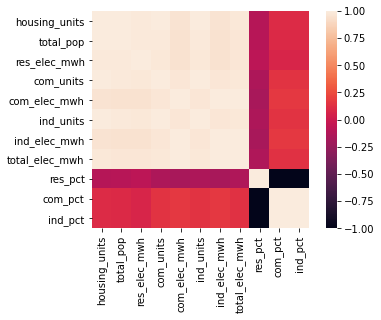

In [0]:
#Correlations for raw data
correlations_1 = city_elec_complete.corr() #Calculate the correlation of the above variables
sns.heatmap(correlations_1, square = True) 


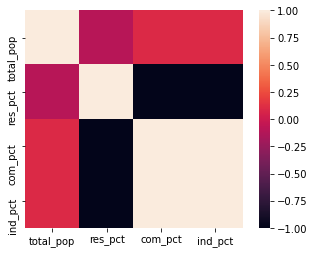

In [0]:
correlations_2 = city_elec_complete[['total_pop','res_pct', 'com_pct', 'ind_pct']].corr()
sns.heatmap(correlations_2, square = True) 

K-Means Clustering Section - Similar Weather Cluster

In [0]:
pip install tslearn

     |████████████████████████████████| 552kB 2.6MB/s 
  Created wheel for tslearn: filename=tslearn-0.3.1-cp36-cp36m-linux_x86_64.whl size=681083 sha256=fbf2c444c2b1768bf790920372298e559bd9c170ec6002f800f4417daa62ecec
  Stored in directory: /root/.cache/pip/wheels/57/77/ee/922525fa91c7363885969abb29defc87cfecd8488cd02c4bda
Successfully built tslearn


In [0]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


Show Optimal K using elbow method for similar weather

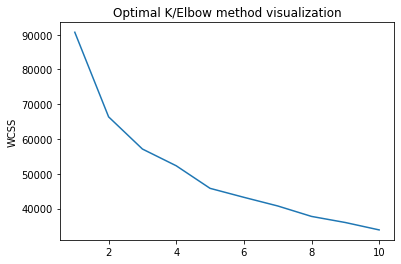

In [0]:
#Scale the data as the data is in different units
city_wx_cluster = city_wx_data[['City', 'Temperature',
       'Relative Humidity', 'Precipitable Water', 'Wind Direction',
       'Cloud Type', 'Dew Point', 'Wind Speed']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

req_cols = ['Temperature',
       'Relative Humidity', 'Precipitable Water', 'Wind Direction',
       'Cloud Type', 'Dew Point', 'Wind Speed']

city_wx_cluster_scaled = scaler.fit_transform(city_wx_cluster[req_cols])
city_wx_cluster_scaled_df = pd.DataFrame(city_wx_cluster_scaled)

#Add back the city column
city_wx_cluster_scaled_df['City'] = city_wx_cluster['City']

list_of_cities = list(set(city_wx_cluster.City.values))
np.array(city_wx_cluster_scaled_df[city_wx_cluster_scaled_df.City == list_of_cities[0]].iloc[:,0:7])
wx_cluster = []

for i in range(0,len(list_of_cities)):
    wx_cluster.append(np.array(city_wx_cluster_scaled_df[city_wx_cluster_scaled_df.City == list_of_cities[i]].iloc[:,0:7]))


wcss = []
for i in range(1,11):
    ts_kmeans =  TimeSeriesKMeans(n_clusters = i, metric="euclidean", max_iter = 2, max_iter_barycenter=2, random_state = 5).fit(wx_cluster)
    wcss.append(ts_kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Optimal K/Elbow method visualization')
plt.ylabel('WCSS')
plt.show()

In [0]:
from sklearn.metrics import pairwise_distances_argmin_min
city_wx_cluster = pd.DataFrame(list_of_cities)
ts_kmeans_optimal = TimeSeriesKMeans(n_clusters = 5, metric="euclidean", max_iter = 3, max_iter_barycenter=3, random_state = 5).fit(wx_cluster)
wx_cluster_label = list(ts_kmeans_optimal.labels_)
city_wx_cluster['Weather Cluster'] = wx_cluster_label
city_wx_cluster.columns = ['City', 'Weather Cluster']

# Similar Weather Cluster 

In [0]:
city_wx_cluster

,City,Weather Cluster
0,Alhambra,0
1,Hollister,1
2,Livermore,1
3,Yorba Linda,0
4,Long Beach,0
...,...,...
446,Apple Valley,4
447,Paradise,3
448,Folsom,3
449,Buellton,0


In [0]:
wx_cluster_0 = city_wx_cluster[city_wx_cluster['Weather Cluster'] == 0].merge(city_elec_complete,on='City')
wx_cluster_1 = city_wx_cluster[city_wx_cluster['Weather Cluster'] == 1].merge(city_elec_complete,on='City')
wx_cluster_2 = city_wx_cluster[city_wx_cluster['Weather Cluster'] == 2].merge(city_elec_complete,on='City')
wx_cluster_3 = city_wx_cluster[city_wx_cluster['Weather Cluster'] == 3].merge(city_elec_complete,on='City')
wx_cluster_4 = city_wx_cluster[city_wx_cluster['Weather Cluster'] == 4].merge(city_elec_complete,on='City')

In [0]:
wx_cluster_0

,City,Weather Cluster,housing_units,total_pop,res_elec_mwh,com_units,com_elec_mwh,ind_units,ind_elec_mwh,total_elec_mwh,res_pct,com_pct,ind_pct
0,Alhambra,0,29137.0,84866.0,133938.0,1169.0,155657.0,1169.0,155657.0,445252.0,0.300814,0.349593,0.349593
1,Yorba Linda,0,21902.0,67362.0,210196.0,698.0,92004.0,698.0,92004.0,394204.0,0.533216,0.233392,0.233392
2,Long Beach,0,163850.0,469793.0,805726.0,5468.0,712853.0,5468.0,712853.0,2231432.0,0.361080,0.319460,0.319460
3,Rancho Santa Margarita,0,16960.0,49038.0,147145.0,318.0,43143.0,318.0,43143.0,233431.0,0.630358,0.184821,0.184821
4,La Palma,0,5016.0,15834.0,36433.0,143.0,28191.0,143.0,28191.0,92815.0,0.392534,0.303733,0.303733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Huntington Park,0,14758.0,58921.0,51866.0,620.0,82858.0,620.0,82858.0,217582.0,0.238374,0.380813,0.380813
136,Mission Viejo,0,33847.0,96178.0,271799.0,1137.0,169267.0,1137.0,169267.0,610333.0,0.445329,0.277335,0.277335
137,Brea,0,14424.0,41351.0,108720.0,550.0,105646.0,550.0,105646.0,320012.0,0.339737,0.330131,0.330131
138,Simi Valley,0,42242.0,126126.0,340856.0,1272.0,159968.0,1272.0,159968.0,660792.0,0.515829,0.242085,0.242085


# Plot optimal K for each Weather Cluster

In [0]:
def plot_elbow_method(cluster_df):
    wcss = []
    for i in range(1,5):
        kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 5)
        kmeans.fit(cluster_df)
        wcss.append(kmeans.inertia_)
        
    plt.plot(range(1,5),wcss)
    plt.title('Optimal K/Elbow method visualization')
    plt.ylabel('WCSS')
    plt.show()
    
req_columns = ['total_pop','res_pct', 'com_pct', 'ind_pct']

def get_kmeans_labels(cluster_df):
    kmeans = KMeans(n_clusters = 2, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 5).fit(cluster_df)
    labels = list(kmeans.labels_)
    return labels

def get_closest_to_centroid(cluster_df):
    from sklearn.metrics import pairwise_distances_argmin_min
    kmeans = KMeans(n_clusters = 2, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 5).fit(cluster_df)
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, cluster_df)
    return closest


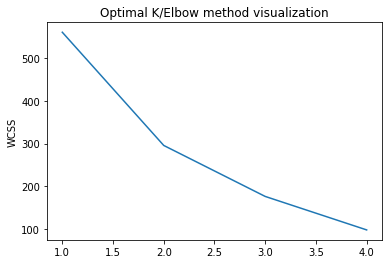

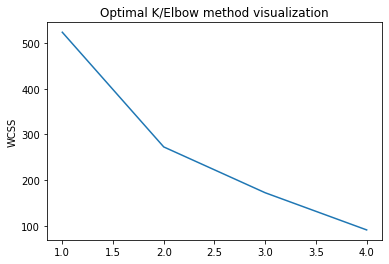

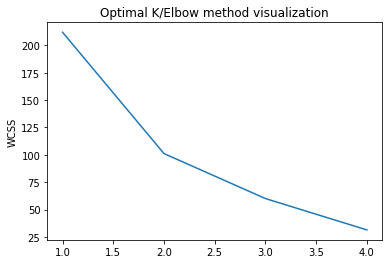

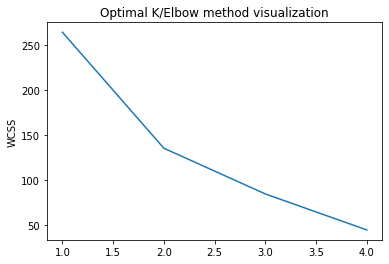

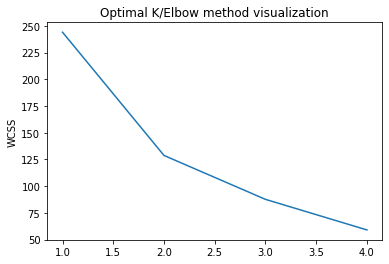

In [0]:
cluster_0_sub = wx_cluster_0[req_columns]
cluster_1_sub = wx_cluster_1[req_columns]
cluster_2_sub = wx_cluster_2[req_columns]
cluster_3_sub = wx_cluster_3[req_columns]
cluster_4_sub = wx_cluster_4[req_columns]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cluster_0_sub_scaled = scaler.fit_transform(cluster_0_sub)
cluster_1_sub_scaled = scaler.fit_transform(cluster_1_sub)
cluster_2_sub_scaled = scaler.fit_transform(cluster_2_sub)
cluster_3_sub_scaled = scaler.fit_transform(cluster_3_sub)
cluster_4_sub_scaled = scaler.fit_transform(cluster_4_sub)

plot_elbow_method(cluster_0_sub_scaled)
plot_elbow_method(cluster_1_sub_scaled)
plot_elbow_method(cluster_2_sub_scaled)
plot_elbow_method(cluster_3_sub_scaled)
plot_elbow_method(cluster_4_sub_scaled)

wx_cluster_0['Electric Sub-Cluster'] = get_kmeans_labels(wx_cluster_0[req_columns])
wx_cluster_1['Electric Sub-Cluster'] = get_kmeans_labels(wx_cluster_1[req_columns])
wx_cluster_2['Electric Sub-Cluster'] = get_kmeans_labels(wx_cluster_2[req_columns])
wx_cluster_3['Electric Sub-Cluster'] = get_kmeans_labels(wx_cluster_3[req_columns])
wx_cluster_4['Electric Sub-Cluster'] = get_kmeans_labels(wx_cluster_4[req_columns])

ex_wx_cluster_0 = wx_cluster_0[['City', 'Weather Cluster', 'Electric Sub-Cluster']]
ex_wx_cluster_1 = wx_cluster_1[['City', 'Weather Cluster', 'Electric Sub-Cluster']]
ex_wx_cluster_2 = wx_cluster_2[['City', 'Weather Cluster', 'Electric Sub-Cluster']]
ex_wx_cluster_3 = wx_cluster_3[['City', 'Weather Cluster', 'Electric Sub-Cluster']]
ex_wx_cluster_4 = wx_cluster_4[['City', 'Weather Cluster', 'Electric Sub-Cluster']]

all_ex_wx_cluster = ex_wx_cluster_0.append([ex_wx_cluster_1, ex_wx_cluster_2, ex_wx_cluster_3,ex_wx_cluster_4])

# View Final Cluster+Sub-Cluster Allocation

In [0]:
all_ex_wx_cluster 

,City,Weather Cluster,Electric Sub-Cluster
0,Alhambra,0,0
1,Yorba Linda,0,0
2,Long Beach,0,0
3,Rancho Santa Margarita,0,0
4,La Palma,0,0
...,...,...,...
56,Rancho Mirage,4,1
57,Rialto,4,1
58,Fontana,4,0
59,Pomona,4,0


In [0]:
#Plot needs work
# X = wx_cluster_4[['res_elec_mwh', 'com_elec_mwh', 'ind_elec_mwh','Electric Sub-Cluster']]
# plt.scatter(X[X['Electric Sub-Cluster'] == 0]['res_elec_mwh'], X[X['Electric Sub-Cluster'] == 0]['ind_elec_mwh'], s = 100, c = 'red', label = 'Cluster 0')
# plt.scatter(X[X['Electric Sub-Cluster'] == 1]['res_elec_mwh'], X[X['Electric Sub-Cluster'] == 1]['ind_elec_mwh'], s = 100, c = 'blue', label = 'Cluster 1')
# #plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Sub-Cluster in Wx Cluster 4')
# plt.xlabel('Residential Electric Load ')
# plt.ylabel('Commercial Electric Load')
# plt.legend()
# plt.show()

# Weather Cluster Centroids and cities closest to the centroids

In [0]:
# wx_centroid_0_ix = pairwise_distances_argmin_min(ts_kmeans_optimal.cluster_centers_[0], city_wx_cluster_scaled_df.iloc[:,0:7])
# wx_centroid_1_ix = pairwise_distances_argmin_min(ts_kmeans_optimal.cluster_centers_[1], city_wx_cluster_scaled_df.iloc[:,0:7])
# wx_centroid_2_ix = pairwise_distances_argmin_min(ts_kmeans_optimal.cluster_centers_[2], city_wx_cluster_scaled_df.iloc[:,0:7])
# wx_centroid_3_ix = pairwise_distances_argmin_min(ts_kmeans_optimal.cluster_centers_[3], city_wx_cluster_scaled_df.iloc[:,0:7])
# wx_centroid_4_ix = pairwise_distances_argmin_min(ts_kmeans_optimal.cluster_centers_[4], city_wx_cluster_scaled_df.iloc[:,0:7])
# city_scaled_array = np.array(city_wx_cluster_scaled_df.iloc[:,0:7])
# pairwise_distances_argmin_min(ts_kmeans_optimal.cluster_centers_[0], city_scaled_array))


# Sub-Cluster Centroid and cities closest to the centroid

In [0]:
wx_0_centroid_0 = get_closest_to_centroid(wx_cluster_0[req_columns])[0]
wx_0_centroid_1 = get_closest_to_centroid(wx_cluster_0[req_columns])[1]
wx_1_centroid_0 = get_closest_to_centroid(wx_cluster_1[req_columns])[0]
wx_1_centroid_1 = get_closest_to_centroid(wx_cluster_1[req_columns])[1]
wx_2_centroid_0 = get_closest_to_centroid(wx_cluster_2[req_columns])[0]
wx_2_centroid_1 = get_closest_to_centroid(wx_cluster_2[req_columns])[1]
wx_3_centroid_0 = get_closest_to_centroid(wx_cluster_3[req_columns])[0]
wx_3_centroid_1 = get_closest_to_centroid(wx_cluster_3[req_columns])[1]
wx_4_centroid_0 = get_closest_to_centroid(wx_cluster_4[req_columns])[0]
wx_4_centroid_1 = get_closest_to_centroid(wx_cluster_4[req_columns])[1]

In [0]:
wx_0_centroid_0_city = wx_cluster_0.loc[wx_0_centroid_0]['City']
wx_0_centroid_1_city = wx_cluster_0.loc[wx_0_centroid_1]['City']
wx_1_centroid_0_city = wx_cluster_1.loc[wx_1_centroid_0]['City']
wx_1_centroid_1_city = wx_cluster_1.loc[wx_1_centroid_1]['City']
wx_2_centroid_0_city = wx_cluster_2.loc[wx_2_centroid_0]['City']
wx_2_centroid_1_city = wx_cluster_2.loc[wx_2_centroid_1]['City']
wx_3_centroid_0_city = wx_cluster_3.loc[wx_3_centroid_0]['City']
wx_3_centroid_1_city = wx_cluster_3.loc[wx_3_centroid_1]['City']
wx_4_centroid_0_city = wx_cluster_4.loc[wx_4_centroid_0]['City']
wx_4_centroid_1_city = wx_cluster_4.loc[wx_4_centroid_1]['City']
cities_list = [wx_0_centroid_0_city,wx_0_centroid_1_city,wx_1_centroid_0_city,wx_1_centroid_1_city,wx_2_centroid_0_city,wx_2_centroid_1_city,wx_3_centroid_0_city,wx_3_centroid_1_city,wx_4_centroid_0_city,wx_4_centroid_1_city]

cities_list

['Lakewood',
 'Los Angeles',
 'San Luis Obispo',
 'San Francisco',
 'Atwater',
 'Bakersfield',
 'South Lake Tahoe',
 'Sacramento',
 'Santa Clarita',
 'Beaumont']

# Creating Test and Training Split

In [0]:
#Create test and training set
cities = cities_list
df = city_wx_data[city_wx_data.City == cities[0]].drop('City', axis = 1)
df = df.reset_index()
df = df.drop('index', axis = 1)
req_cols = list(df.columns[0:4])
mod_cols = list(df.columns[4:len(df.columns)])
append_str = cities[0]
mod_cols = [append_str + ' ' + sub for sub in mod_cols] 
mod_cols = [sub.replace(' ', '_') for sub in mod_cols]
mod_cols = [sub.lower() for sub in mod_cols]
new_cols = req_cols+mod_cols
df.columns = new_cols



for i in range(1,len(cities)):
    df_1 = city_wx_data[city_wx_data.City == cities[i]].drop('City', axis = 1)
    df_1 = df_1.reset_index()
    df_1 = df_1.drop('index', axis = 1)
    req_cols_1 = list(df_1.columns[0:4])
    mod_cols_1 = list(df_1.columns[4:len(df_1.columns)])
    append_str = cities[i]
    mod_cols_1 = [append_str + ' ' + sub for sub in mod_cols_1] 
    mod_cols_1 = [sub.replace(' ', '_') for sub in mod_cols_1]
    mod_cols_1 = [sub.lower() for sub in mod_cols_1]
    new_cols_1 = req_cols_1+mod_cols_1
    df_1.columns = new_cols_1
    df = df.merge(df_1, on = req_cols)

    
final_data = df.merge(caiso_total,on = ['Day', 'Year', 'Hour', 'Month'])
final_data = final_data.drop(['Date','PGE','SCE','SDGE','VEA'],axis = 1)
final_data_X = final_data.drop(['CAISO Total'],axis = 1)
final_data_X_train = final_data_X[(final_data_X['Year'] < 2018)]
final_data_X_test = final_data_X[final_data_X.Year == 2018]
final_data_Y_train = final_data[(final_data_X['Year'] < 2018)]['CAISO Total']
final_data_Y_test = final_data[final_data.Year == 2018]['CAISO Total']

# Modelling Section - Basic SVR and RF

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
rf_regressor.fit(final_data_X_train, final_data_Y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVR
svr_regressor = SVR()
svr_regressor.fit(final_data_X_train, final_data_Y_train) 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svr_regressor_1 = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
svr_regressor_1.fit(X_train, y_train) 
y_pred_svr = svr_regressor_1.predict(final_data_X_test)

NameError: ignored

In [0]:
y_pred_rf = rf_regressor.predict(final_data_X_test)
y_test = list(final_data_Y_test)
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Decision Tree Section

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(final_data_X_train, final_data_Y_train)

print('features: {}'.format(tree.tree_.n_features))
print("Number of nodes (leaves): {}".format(tree.tree_.node_count), "\n")

train_score = tree.score(final_data_X_train, final_data_Y_train)
test_score = tree.score(final_data_X_test, final_data_Y_test)
y_pred_tree = tree.predict(final_data_X_test)

print(train_score)
print(test_score)

features: 76
Number of nodes (leaves): 17517 

1.0
0.7309841299471996


In [0]:
pd.DataFrame({'Feature': final_data_X_train.columns, 'Importance': tree.feature_importances_}).sort_values(by ='Importance', ascending = False)

,Feature,Importance
33,atwater_relative_humidity,4.725321e-01
3,Hour,2.622625e-01
74,Day_of_week,5.959265e-02
32,atwater_temperature,4.887957e-02
39,bakersfield_temperature,4.577371e-02
...,...,...
30,san_francisco_dew_point,1.410672e-04
8,lakewood_cloud_type,6.744324e-05
36,atwater_cloud_type,5.573809e-05
64,santa_clarita_cloud_type,4.695212e-05


NameError: ignored

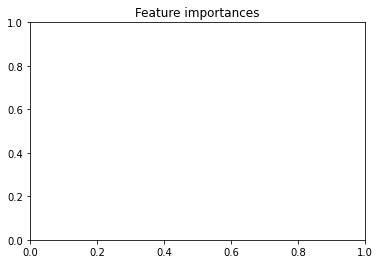

In [0]:
# # Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(final_data_X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.show()

In [0]:
# tuned tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters = {'max_leaf_nodes': randint(3, 200),
              'max_features': randint(2, 76),
              'max_depth': randint(1, 10)}
rnd_params = RandomizedSearchCV(tree, param_distributions = parameters, cv = 10, n_iter = 200)
rnd_params.fit(final_data_X_train, final_data_Y_train)

best_parameters = rnd_params.best_params_
print(best_parameters)

tree.set_params(max_features=best_parameters['max_features'], max_leaf_nodes=best_parameters['max_leaf_nodes'])
tree.fit(final_data_X_train, final_data_Y_train)

tuned_train_score = tree.score(final_data_X_train, final_data_Y_train)
tuned_test_score = tree.score(final_data_X_test, final_data_Y_test)
y_pred_tuned_tree = tree.predict(final_data_X_test)

print(tuned_train_score)
print(tuned_test_score)


#tree.export_graphviz(tree, 'tuned_tree.dot', feature_names = final_data_X_train.columns)
#! dot -Tpng tuned_tree.dot -o tuned_tree.png

In [0]:
print(rnd_params.best_score_)

# Randomized Search for Hyperparameter Tuning (RF Regression)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor()
rf_tree.fit(final_data_X_train, final_data_Y_train)

param_dist = {'n_estimators': randint(10, 100),
               'max_leaf_nodes': randint(3, 100),
               'max_features': ["auto"],
               'max_depth': randint(1, 10),
               'min_samples_leaf': randint(1, 30),
               'min_samples_split': randint(2, 20)}

rnd_search_rf = RandomizedSearchCV(rf_tree, param_distributions=param_dist, 
                                 cv=10, n_iter=50)
rnd_search_rf.fit(final_data_X_train, final_data_Y_train)

rf_tree.set_params(n_estimators=rnd_search_rf.best_params_['n_estimators'], 
                     max_leaf_nodes=rnd_search_rf.best_params_['max_leaf_nodes'], 
                     max_features = rnd_search_rf.best_params_['max_features'],
                     max_depth = rnd_search_rf.best_params_['max_depth'],
                     min_samples_leaf = rnd_search_rf.best_params_['min_samples_leaf'],
                     min_samples_split = rnd_search_rf.best_params_['min_samples_split'])

print(rnd_search_rf.best_params_)
                   


In [0]:
rf_train_score = rf_tree.score(final_data_X_train, final_data_Y_train)
rf_test_score = rf_tree.score(final_data_X_test, final_data_Y_test)
print(rf_train_score)
print(rf_test_score) 


# Feature Importances from RF Regression

In [0]:
importances = rf_tree.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_tree.estimators_],
              axis=0)
indices = np.argsort(importances)[::-1]

#Print the feature ranking
print("Feature ranking:")

for f in range(final_data_X_train.shape[1]):
     print("%d. %s (%f)" % (f, final_data_X_train.columns[indices[f]], importances[indices[f]]))

# # Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(final_data_X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.show()

In [0]:
pd.DataFrame({'Feature': final_data_X_train.columns, 'Importance': rf_tree.feature_importances_}).sort_values(by ='Importance', ascending = False)

In [0]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVR
svr_regressor = SVR()
svr_regressor.fit(final_data_X_train, final_data_Y_train) 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svr_regressor_1 = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
svr_regressor_1.fit(final_data_X_train, final_data_Y_train)
y_pred_svr = svr_regressor_1.predict(final_data_X_test)

#Results and MAPE Analysis -- create MAPE Pivot Tables

In [0]:
results_df = final_data[final_data.Year == 2018]
results_df = results_df[['Day', 'Month','Hour', 'Year', 'CAISO Total']]
results_df['RF_Tuned_Prediction'] = rf_tree.predict(final_data_X_test)
results_df['RF_Basic_Prediction'] = y_pred_rf
results_df['SVR_Prediction'] = y_pred_svr
results_df['DTree_Prediction'] = y_pred_tree
results_df['DTree_Tuned_Prediction'] = y_pred_tuned_tree

In [0]:
results_df['Hourly_MAPE_RF_Basic'] = abs((results_df['CAISO Total'] - results_df['RF_Basic_Prediction'])/results_df['CAISO Total'])*100
results_df['Hourly_MAPE_RF_Tuned'] = abs((results_df['CAISO Total'] - results_df['RF_Tuned_Prediction'])/results_df['CAISO Total'])*100
results_df['Hourly_MAPE_SVR'] = abs((results_df['CAISO Total'] - results_df['SVR_Prediction'])/results_df['CAISO Total'])*100
results_df['Hourly_MAPE_DTree'] = abs((results_df['CAISO Total'] - results_df['DTree_Prediction'])/results_df['CAISO Total'])*100
results_df['Hourly_MAPE_DTree_Tuned'] = abs((results_df['CAISO Total'] - results_df['DTree_Tuned_Prediction'])/results_df['CAISO Total'])*100
results_df

NameError: ignored

In [0]:
# get count by month


In [0]:

def get_month_count(df):
  month = [0]*12   
  for i in range(0, len(df)):
    if df['Month'].iloc[i] == 1:
        month[0] += 1
    elif df['Month'].iloc[i] == 2:
        month[1] += 1
    elif df['Month'].iloc[i] == 3:
        month[2] += 1
    elif df['Month'].iloc[i] == 4:
        month[3] += 1
    elif df['Month'].iloc[i] == 5:
        month[4] += 1
    elif df['Month'].iloc[i] == 6:
        month[5] += 1
    elif df['Month'].iloc[i] == 7:
        month[6] += 1
    elif df['Month'].iloc[i] == 8:
       month[7] += 1
    elif df['Month'].iloc[i] == 9:
        month[8] += 1
    elif df['Month'].iloc[i] == 10:
        month[9] += 1
    elif df['Month'].iloc[i] == 11:
        month[10] += 1
    elif df['Month'].iloc[i] == 12:
        month[11] += 1
  return month

d = get_month_count(results_df)
print(d)

[744, 672, 744, 720, 744, 720, 744, 744, 720, 744, 720, 720]


In [0]:
import pandas as pd 

def get_mape_by_month(df, column_name):
  final = df.pivot_table(column_name, index = 'Month', aggfunc='sum')
  return final 

def mean(dataframe, d):
  for i in range(0, len(dataframe)):
    dataframe.iloc[i] = dataframe.iloc[i] / d[i]
  
  return dataframe


def create_mape_table(df, d):
  final_frame = pd.DataFrame()
  columns = list(df.columns[10:len(df.columns)])
  for i, val in enumerate(columns): 
    temp = get_mape_by_month(df,val)
    temp_frame = mean(temp, d)
    final_frame = pd.concat([final_frame, temp_frame], axis = 1)
  return final_frame 

final_frame = create_mape_table(results_df, d)
final_frame
#final_frame.drop(['Hourly_MAPE_SVR'], axis = 1)

NameError: ignored